In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv(r"C:\Users\salih\Documents\BIG Data Dataset\Data\UK_Accident.csv")

In [37]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [38]:
num_rows = df.shape[0]  # Number of rows
num_columns = df.shape[1]  # Number of columns

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1504150
Number of columns: 33


In [39]:
# Optionally, display the column names
print("Column names:")
print(df.columns)

Column names:
Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [40]:
df.isnull().sum()

Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

In [41]:
df_cleaned = df.dropna()

In [42]:
# Print the number of rows before and after removing nulls
print(f"Rows before removing nulls: {len(df)}")
print(f"Rows after removing nulls: {len(df_cleaned)}")

Rows before removing nulls: 1504150
Rows after removing nulls: 910


In [43]:
columns_to_remove = ["LSOA_of_Accident_Location", "Carriageway_Hazards", 
                     "Special_Conditions_at_Site", "Junction_Control"]

# Remove the columns
df = df.drop(columns=columns_to_remove)

# Print the updated DataFrame
print(f"Columns after removal: {df.columns}")

Columns after removal: Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')


In [44]:
df_cleaned = df.dropna()

In [45]:
# Print the number of rows before and after removing nulls
print(f"Rows before removing nulls: {len(df)}")
print(f"Rows after removing nulls: {len(df_cleaned)}")

Rows before removing nulls: 1504150
Rows after removing nulls: 1503890


In [46]:
# Function to inspect and debug 'Time' column
def debug_time_column(df):
    print("\nOriginal 'Time' column sample:")
    print(df['Time'].head())  # Display the first few rows of the column

    # Identify rows where the 'Time' column fails conversion
    invalid_times = df['Time'][pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').isna()]
    print(f"\nSample of invalid 'Time' values (if any):")
    print(invalid_times)

# Function to standardize Date and Time columns
def standardize_datetime(df):
    # Ensure 'Date' is in datetime format
    df.loc[:, 'Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

    # Attempt to parse 'Time', and debug if issues arise
    try:
        # Convert 'Time' to datetime and extract only the time part
        df.loc[:, 'Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time
    except Exception as e:
        print(f"Error parsing 'Time': {e}")
        debug_time_column(df)  # Call debugging function
    
    return df

# Function to validate Latitude and Longitude
def validate_geographic_data(df):
    # Ensure latitude values are within valid range (-90 to 90)
    df.loc[:, 'Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df.loc[(df['Latitude'] < -90) | (df['Latitude'] > 90), 'Latitude'] = np.nan

    # Ensure longitude values are within valid range (-180 to 180)
    df.loc[:, 'Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
    df.loc[(df['Longitude'] < -180) | (df['Longitude'] > 180), 'Longitude'] = np.nan

    return df

# Apply the standardization and validation functions
df_cleaned = standardize_datetime(df_cleaned)
df_cleaned = validate_geographic_data(df_cleaned)

# Check for invalid or missing data after processing
print("\nSummary of missing or invalid data:")
print(f"Missing or invalid 'Date' values: {df_cleaned['Date'].isna().sum()}")
print(f"Missing or invalid 'Time' values: {df_cleaned['Time'].isna().sum()}")
print(f"Missing or invalid 'Latitude' values: {df_cleaned['Latitude'].isna().sum()}")
print(f"Missing or invalid 'Longitude' values: {df_cleaned['Longitude'].isna().sum()}")



Summary of missing or invalid data:
Missing or invalid 'Date' values: 0
Missing or invalid 'Time' values: 0
Missing or invalid 'Latitude' values: 0
Missing or invalid 'Longitude' values: 0


In [47]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)

# Extract the year from the 'Date' column
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Find the minimum and maximum year in the dataset
start_year = df_cleaned['Year'].min()
end_year = df_cleaned['Year'].max()

print(f"Starting year: {start_year}")
print(f"Ending year: {end_year}")

Starting year: 2005
Ending year: 2014


C:\Users\salih\AppData\Local\Temp\ipykernel_7944\3701965221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)
C:\Users\salih\AppData\Local\Temp\ipykernel_7944\3701965221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Date'].dt.year


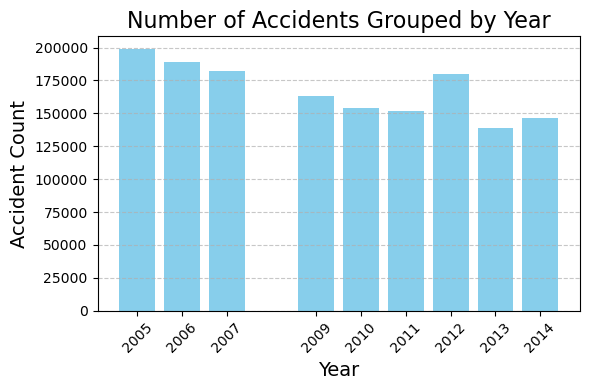

In [60]:
accidents_by_year = df_cleaned.groupby('Year').size().reset_index(name='Accident_Count')
plt.figure(figsize=(6, 4))
plt.bar(accidents_by_year['Year'], accidents_by_year['Accident_Count'], color='skyblue')

plt.xticks(accidents_by_year['Year'], rotation=45)

plt.title('Number of Accidents Grouped by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

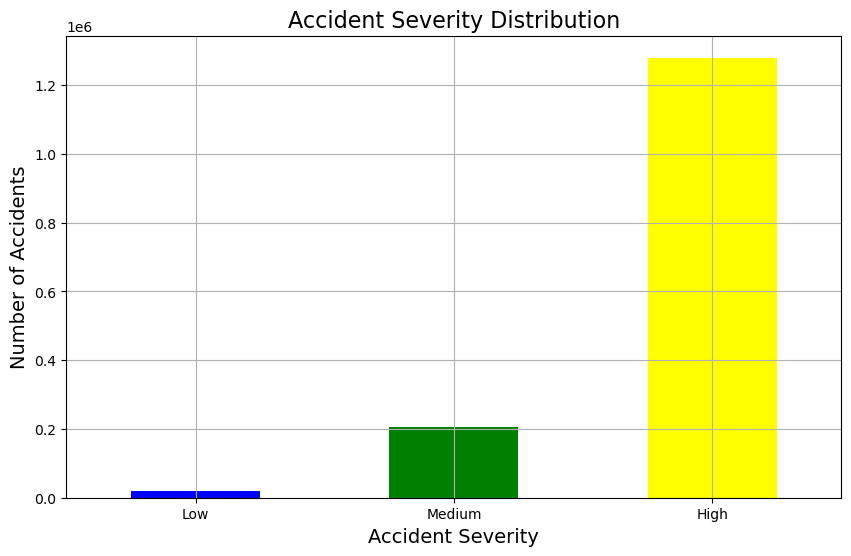

In [48]:
severity_labels = {1: 'Low', 2: 'Medium', 3: 'High'}

# Create a bar chart
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=['blue', 'green', 'yellow'])

# Customize the chart
plt.title('Accident Severity Distribution', fontsize=16)
plt.xlabel('Accident Severity', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(ticks=range(len(severity_counts)), labels=[severity_labels.get(i, str(i)) for i in severity_counts.index], rotation=0)

# Display the chart
plt.grid(True)
plt.show()

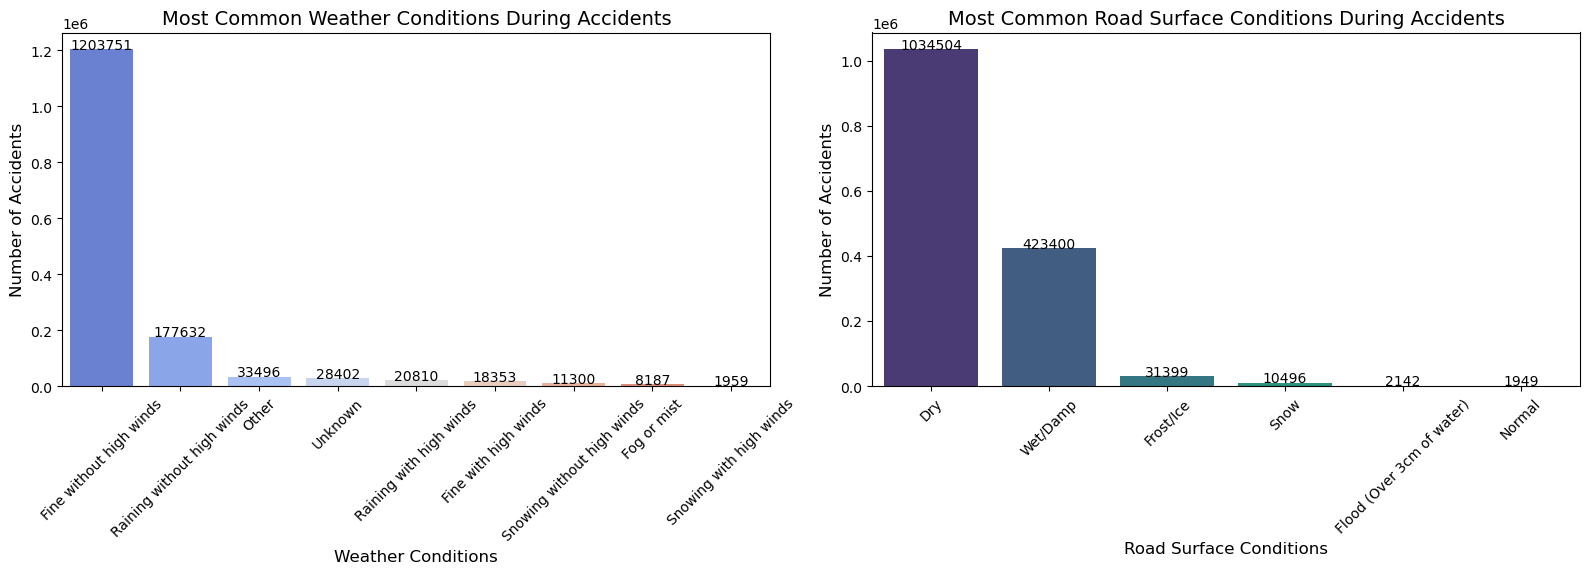

In [49]:
weather_counts = df_cleaned['Weather_Conditions'].value_counts()

road_surface_counts = df_cleaned['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Most Common Weather Conditions During Accidents', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)

for index, value in enumerate(weather_counts.values):
    plt.text(index, value + 1000, f"{value}", ha='center', fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x=road_surface_counts.index, y=road_surface_counts.values, palette='viridis')
plt.title('Most Common Road Surface Conditions During Accidents', fontsize=14)
plt.xlabel('Road Surface Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)

for index, value in enumerate(road_surface_counts.values):
    plt.text(index, value + 1000, f"{value}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\salih\AppData\Local\Temp\ipykernel_7944\977385539.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)
C:\Users\salih\AppData\Local\Temp\ipykernel_7944\977385539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc['Year'] = df_cleaned['Date'].dt.year


Total number of casualties: 2031724

Casualties per year:
Year
2005    270853
2006    258349
2007    247735
2009    222125
2010    208639
2011    203937
2012    241949
2013    183660
2014    194477
Name: Number_of_Casualties, dtype: object


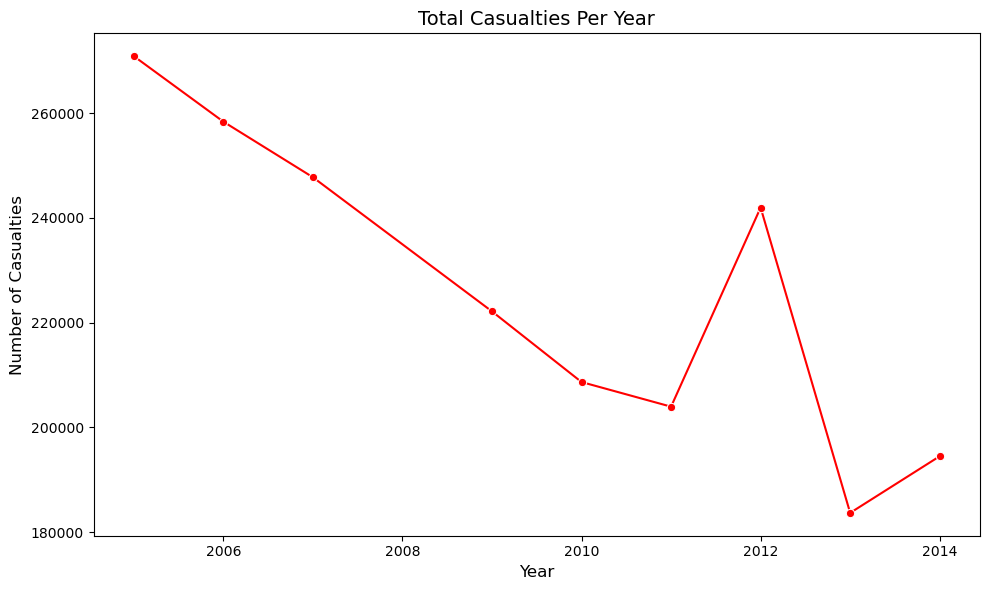

In [50]:
df_cleaned.loc['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)
df_cleaned.loc['Year'] = df_cleaned['Date'].dt.year

total_casualties = df_cleaned['Number_of_Casualties'].sum()
print(f"Total number of casualties: {total_casualties}")

casualties_per_year = df_cleaned.groupby('Year')['Number_of_Casualties'].sum()
print("\nCasualties per year:")
print(casualties_per_year)

plt.figure(figsize=(10, 6))
sns.lineplot(x=casualties_per_year.index, y=casualties_per_year.values, marker='o', color='red')

plt.title('Total Casualties Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)

plt.tight_layout()
plt.show()


Number of casualties on each day of the week:
Day_of_Week
1    239499
2    284004
3    294436
4    297688
5    298988
6    331886
7    285223
Name: Number_of_Casualties, dtype: object


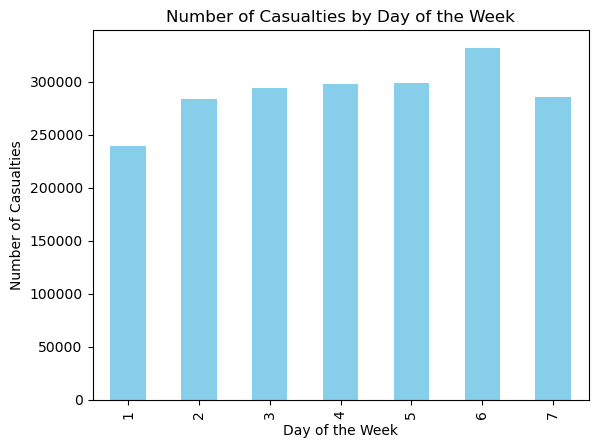

In [51]:

casualties_by_day = df_cleaned.groupby('Day_of_Week')['Number_of_Casualties'].sum()

print("Number of casualties on each day of the week:")
print(casualties_by_day)


casualties_by_day.plot(kind='bar', color='skyblue', title='Number of Casualties by Day of the Week')
plt.ylabel('Number of Casualties')
plt.xlabel('Day of the Week')
plt.show()

Maximum and minimum speed limits on each day of the week:
            max min
Day_of_Week        
1            70  10
2            70  10
3            70  10
4            70  20
5            70  10
6            70  10
7            70  10


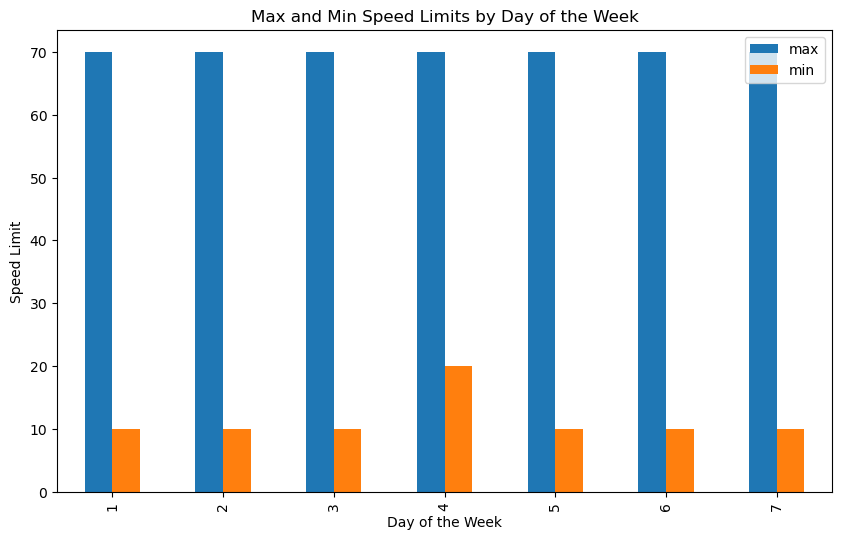

In [52]:
speed_limits = df_cleaned.groupby('Day_of_Week')['Speed_limit'].agg(['max', 'min'])

print("Maximum and minimum speed limits on each day of the week:")
print(speed_limits)


speed_limits.plot(kind='bar', figsize=(10, 6), title='Max and Min Speed Limits by Day of the Week')
plt.ylabel('Speed Limit')
plt.xlabel('Day of the Week')
plt.show()

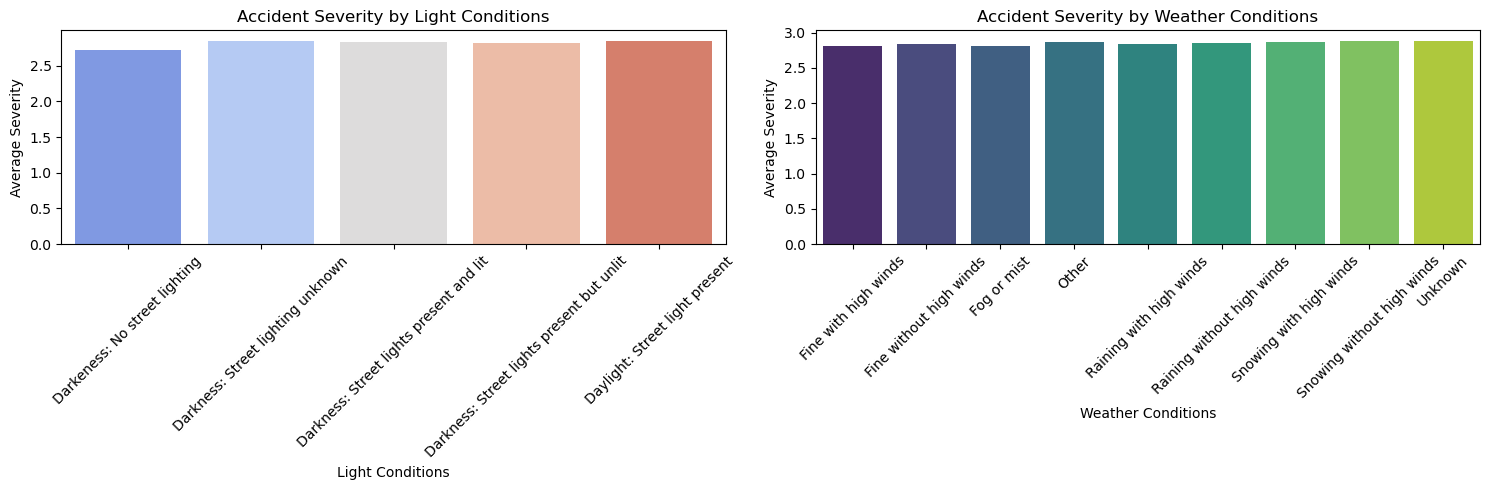

In [53]:
light_severity = df_cleaned.groupby('Light_Conditions')['Accident_Severity'].mean()

weather_severity = df_cleaned.groupby('Weather_Conditions')['Accident_Severity'].mean()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=light_severity.index, y=light_severity.values, ax=ax[0], palette='coolwarm')
ax[0].set_title('Accident Severity by Light Conditions')
ax[0].set_ylabel('Average Severity')
ax[0].set_xlabel('Light Conditions')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

sns.barplot(x=weather_severity.index, y=weather_severity.values, ax=ax[1], palette='viridis')
ax[1].set_title('Accident Severity by Weather Conditions')
ax[1].set_ylabel('Average Severity')
ax[1].set_xlabel('Weather Conditions')
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


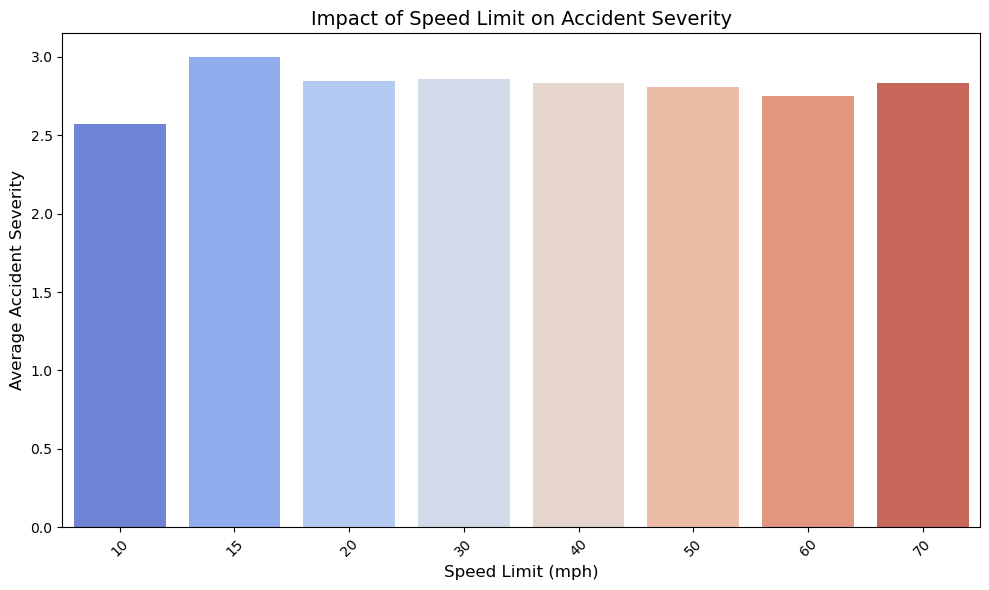

In [54]:
speed_severity = df_cleaned.groupby('Speed_limit')['Accident_Severity'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=speed_severity.index, y=speed_severity.values, palette='coolwarm')

plt.title('Impact of Speed Limit on Accident Severity', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Average Accident Severity', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [55]:
print(df_cleaned[['Road_Type', 'Speed_limit']].dtypes)
print(df_cleaned['Road_Type'].unique())
print(df_cleaned['Speed_limit'].unique())

Road_Type      object
Speed_limit    object
dtype: object
['Single carriageway' 'Dual carriageway' 'One way street' 'Roundabout'
 'Slip road' 'Unknown' nan]
[30 40 50 20 60 70 10 15 NaT nan]


C:\Users\salih\AppData\Local\Temp\ipykernel_7944\1678356131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Speed_limit'] = pd.to_numeric(df_cleaned['Speed_limit'], errors='coerce')


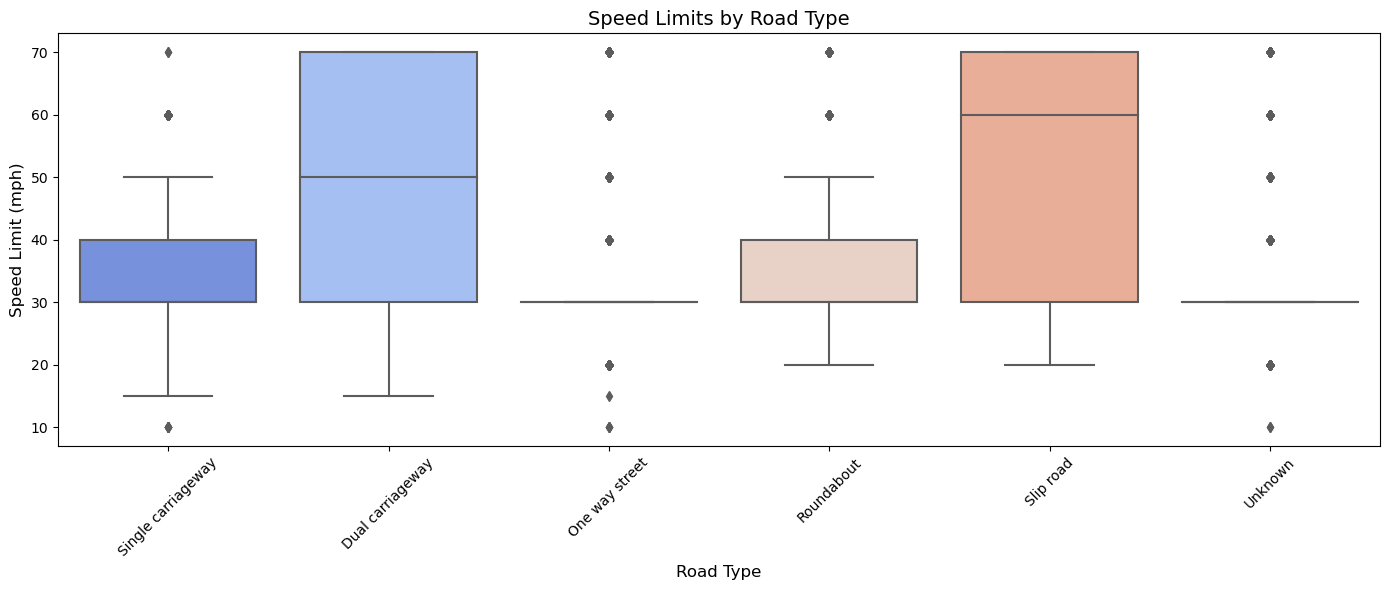

In [56]:

df_cleaned['Speed_limit'] = pd.to_numeric(df_cleaned['Speed_limit'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Road_Type', 'Speed_limit'])

plt.figure(figsize=(14, 6))

sns.boxplot(x='Road_Type', y='Speed_limit', data=df_cleaned, palette='coolwarm')
plt.title('Speed Limits by Road Type', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Speed Limit (mph)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


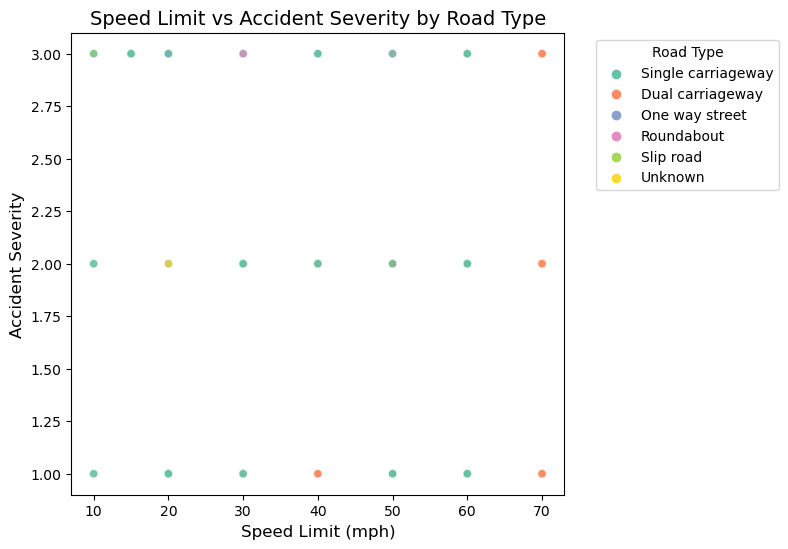

In [57]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Speed_limit', y='Accident_Severity', hue='Road_Type', data=df_cleaned, palette='Set2', alpha=0.7)
plt.title('Speed Limit vs Accident Severity by Road Type', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Accident Severity', fontsize=12)
plt.legend(title='Road Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

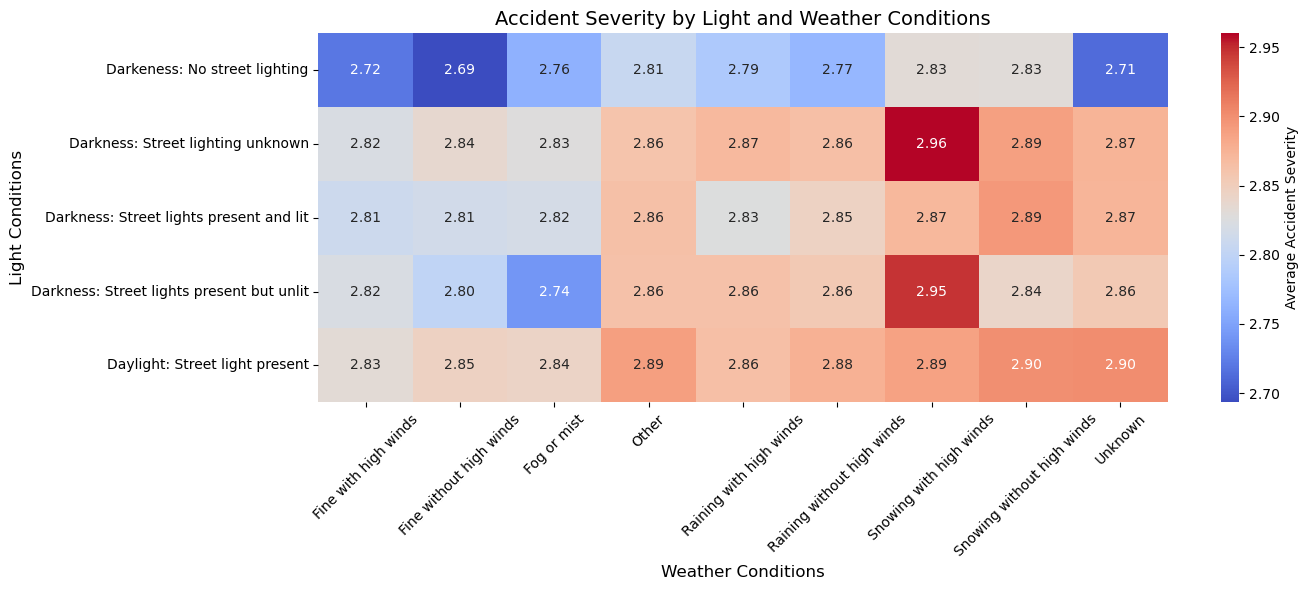

In [58]:
df_cleaned['Accident_Severity'] = pd.to_numeric(df_cleaned['Accident_Severity'], errors='coerce')

light_weather_severity = df_cleaned.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].mean().unstack()

light_weather_severity = light_weather_severity.apply(pd.to_numeric, errors='coerce')


light_weather_severity = light_weather_severity.fillna(0) 

plt.figure(figsize=(14, 6))
sns.heatmap(light_weather_severity, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Accident Severity'})
plt.title('Accident Severity by Light and Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Light Conditions', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

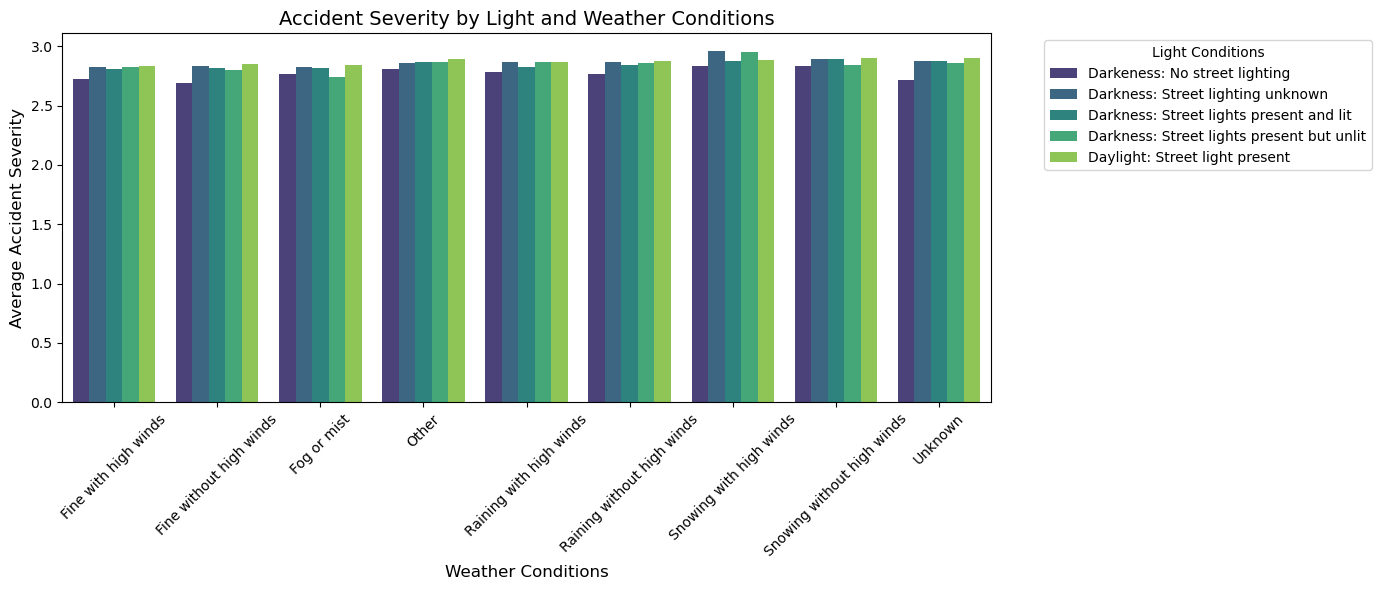

In [59]:
light_weather_severity_reset = df_cleaned.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(
    x='Weather_Conditions', 
    y='Accident_Severity', 
    hue='Light_Conditions', 
    data=light_weather_severity_reset, 
    palette='viridis'
)
plt.title('Accident Severity by Light and Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Average Accident Severity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Light Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()